In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.inspection import DecisionBoundaryDisplay

df = pd.read_csv("loan_data.csv")
display(df)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


In [2]:
df.describe()
# DTI (Debt to Income Ratio)
#Int.Rate (Interest Rate)
# Fico(The Fair Isaac Corporation)
#Revo.Bal(Revolving Balance)
#Revo.Util(Revolving Utilization)
#pub.record(Public Record)
#log.annul.inc(Logic Annual Income ??)





,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [4]:
df.shape

(9578, 14)

In [5]:

# isnull
print(df.isnull().sum())

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64


In [6]:
df['MonthCrLine'] = df['days.with.cr.line'] / 30
df['MonthCrLine'] = df['MonthCrLine'].astype(int)
df['YearCrLine'] = df['MonthCrLine'] / 12
df['YearCrLine'] = df['YearCrLine'].astype(int)
col = df.loc[df['purpose'] == 'debt_consolidation']
df = df.assign(Debt_Consolidation = lambda x: (x['purpose'] == 'debt_consolidation').astype(int))
df = df.assign(Credit_Card = lambda x: (x['purpose'] == 'credit_card').astype(int))
df = df.assign(All_Other = lambda x: (x['purpose'] == 'all_other').astype(int))
df = df.assign(Home_Improvement = lambda x: (x['purpose'] == 'home_improvement').astype(int))
df = df.assign(Small_Business = lambda x: (x['purpose'] == 'small_business').astype(int))
df = df.assign(Major_Purchase = lambda x: (x['purpose'] == 'major_purchase').astype(int))
df = df.assign(Educational = lambda x: (x['purpose'] == 'educational').astype(int))


display(df)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,...,not.fully.paid,MonthCrLine,YearCrLine,Debt_Consolidation,Credit_Card,All_Other,Home_Improvement,Small_Business,Major_Purchase,Educational
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,...,0,187,15,1,0,0,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,...,0,92,7,0,1,0,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,...,0,157,13,1,0,0,0,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,...,0,89,7,1,0,0,0,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,...,0,135,11,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,...,1,349,29,0,0,1,0,0,0,0
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,...,1,146,12,0,0,1,0,0,0,0
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,...,1,115,9,1,0,0,0,0,0,0
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,...,1,60,5,0,0,0,1,0,0,0


In [7]:
df['purpose'].unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

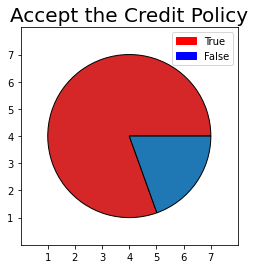

In [8]:
k = df['credit.policy'].sum()#9577
s = df.shape[0] - k
x = [k,s]


# make data
colors = plt.get_cmap('Blues')(np.linspace(0.2, 0.7, len(x)))

# plot
fig, ax = plt.subplots()
pie_labels = ['red', 'blue',]
pie_colors = ['tab:red', 'tab:blue']
ax.pie(x, colors=pie_colors, radius=3, center=(4, 4),
       wedgeprops={"linewidth": 1, "edgecolor": "black"},frame=True)
red_patch = mpatches.Patch(color='red', label='True')
blue_patch = mpatches.Patch(color='blue',label='False')
plt.legend(handles=[red_patch,blue_patch])
plt.title("Accept the Credit Policy", 
          fontsize = 20) 
        

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()

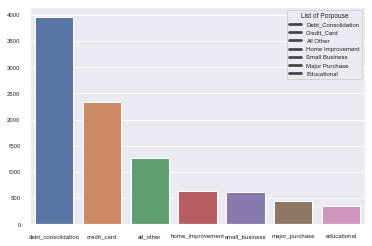

In [9]:
sss = df['purpose'].unique()
kkk = df['purpose'].value_counts().unique()
ax.figure.set_size_inches(50, 30)
sns.set(font_scale = 0.55)
sns.barplot(data=df, x=sss, y= kkk)
plt.legend(labels=["Debt_Consolidation","Credit_Card","All Other","Home Improvement","Small Business","Major Purchase","Educational"], title = "List of Porpouse")


In [10]:
df.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid',
       'MonthCrLine', 'YearCrLine', 'Debt_Consolidation', 'Credit_Card',
       'All_Other', 'Home_Improvement', 'Small_Business', 'Major_Purchase',
       'Educational'],
      dtype='object')

In [11]:
from sklearn.model_selection import cross_val_score
from random import randrange, uniform
import random
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
%pylab inline
from sklearn import metrics 




clf = DecisionTreeClassifier(random_state=0,min_samples_leaf = 7)
X = df.drop(columns = ['purpose','credit.policy'])
y = df['credit.policy']

Xtrain,Xtest,ytrain,ytest = train_test_split(X, y, test_size = 0.3, random_state = 0 )

tree = clf.fit(Xtrain,ytrain)
p = clf.predict(Xtest)

np.sqrt(mean_squared_error(ytest,p))


#depth 2 = 0.22
#depth none = 0,09
#depth 3 = 0,17
#depth 5 =0,11
#depth 7 = 0,10

Populating the interactive namespace from numpy and matplotlib


C:\Users\Desktop\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['uniform', 'random']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


0.09511374723463072

In [12]:
#pylab.figure(figsize(15,10))
#plot_tree(clf, feature_names = Xtrain.columns)

In [13]:
y_pred = clf.predict(Xtest)
print("Accuracy:",metrics.accuracy_score(ytest, y_pred)*100)


Accuracy: 99.09533750869868


In [14]:
 cross_val_score(clf, Xtrain, ytrain, cv=10)


array([0.98211624, 0.99403875, 0.99105812, 0.98658718, 0.98507463,
       0.99104478, 0.98358209, 0.98656716, 0.99402985, 0.9880597 ])

In [15]:
clf.predict_proba(Xtrain)

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [16]:
clf.predict(Xtest)

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [17]:
tree.predict([[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]])

C:\Users\Desktop\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [59]:
tree.predict(Xtest)

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)